# Predicting Video Game Sales 


## Overview
1. Understanding the shape and distribution of the data 
2. Exploratory Data Analysis
3. Feature Engineering
4. Data Pre-processing
5. Model Building and Tuning
6. Final Model

In [1]:
# Load Libaries Needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Read the data
data_path='/kaggle/input/videogamesales/vgsales.csv'
df=pd.read_csv(data_path)
# Print the first 5 rows
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# Look at all the variables in the columns
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [4]:
#Explore the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
# Get a snapshot of the data's central tendencies 
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Text(0.5, 1.0, 'Distribution of Global Sales for Video Games')

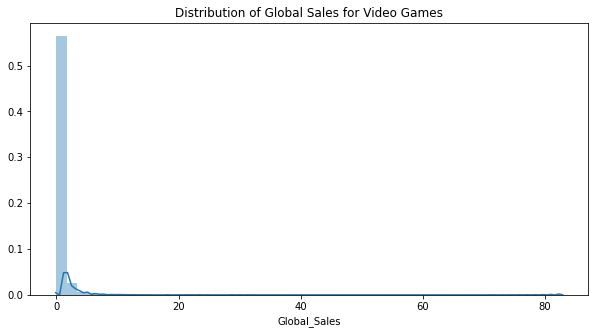

In [6]:
# Let's see how the Global Sales are distritubed for all the data 
f,ax=plt.subplots(figsize=(10,5))
sns.distplot(df['Global_Sales'])
plt.title("Distribution of Global Sales for Video Games")


In [7]:
# Calculate Skewness and Kurtosis 
print ("Skewness: " + str(df['Global_Sales'].skew()))
print ("Kurtosis: "+str(df['Global_Sales'].kurtosis()))

Skewness: 17.400645097552452
Kurtosis: 603.9323461595934


We can see from the plot above that the Global Sales for video games is significantly right skewed with a heavy tail. This may indicate that most video games are quite relatively unsuccessful, however there are few that really break out and have a ton of success. 

In addition to this, the large value for Kurtosis indicates the presence of outliers. This is something we will need to consider later when making our model.

# **Exploring the breakdown of all the numerical and categorical variables**


## Numerical Variables:

* We will create distribution plots to see how each of these are spread out in our dataset.
* We will analyse the correlation between these variables 

## Categorical Variables:
* We will create bar charts to see the distrbution of the data broken down by different variables 

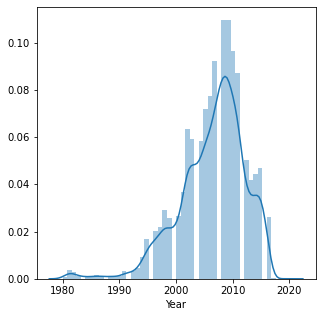

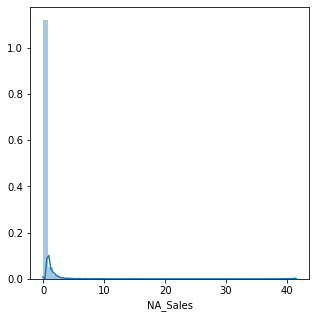

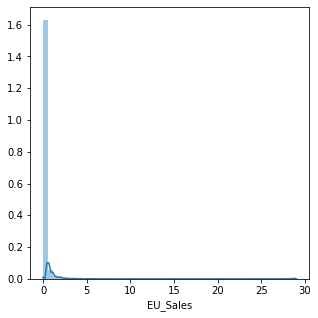

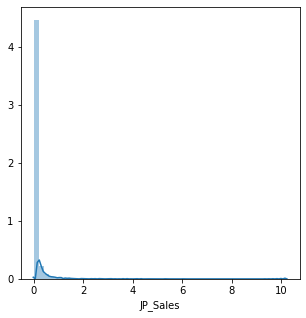

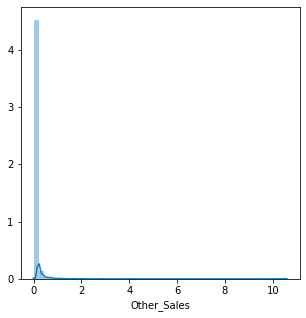

In [8]:
#Numerical Variables 
num= ['Year','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
df_num=df[num]
for var in df_num:
    if var!='Global_Sales':
        f,ax=plt.subplots(figsize=(5,5))
        sns.distplot(df_num[var])


In [9]:
#Calculate Skewness and Kurtosis for each numerical variable
for var in df_num: 
    if var != "Global_Sales":
        print ('Skewness for '+ var + ' is: '+ str(df[var].skew()))
        print ('Kurtosis for '+ var + ' is: '+ str(df[var].kurtosis()))

Skewness for Year is: -1.002560494621347
Kurtosis for Year is: 1.8481805519965588
Skewness for NA_Sales is: 18.799627403792297
Kurtosis for NA_Sales is: 649.1302677259322
Skewness for EU_Sales is: 18.875535100538038
Kurtosis for EU_Sales is: 756.0277957655502
Skewness for JP_Sales is: 11.206458372215543
Kurtosis for JP_Sales is: 194.23399366140464
Skewness for Other_Sales is: 24.233922531429613
Kurtosis for Other_Sales is: 1025.3481445011175


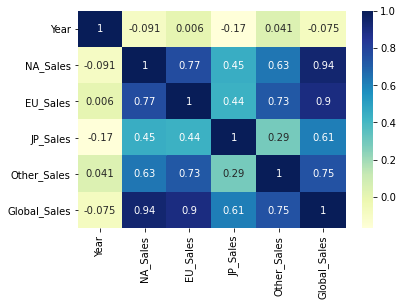

In [10]:
#Calculate Correlation between numeric variables
sns.heatmap(df_num.corr(),annot=True,cmap="YlGnBu")

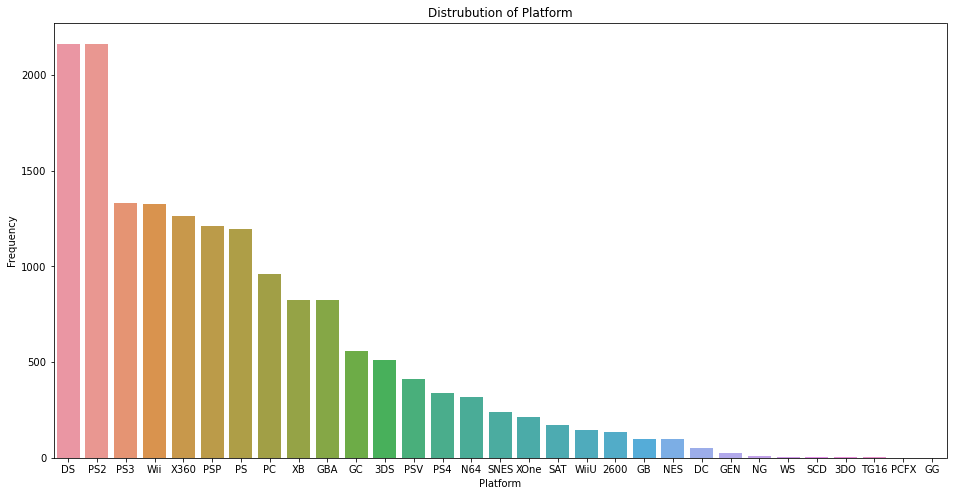

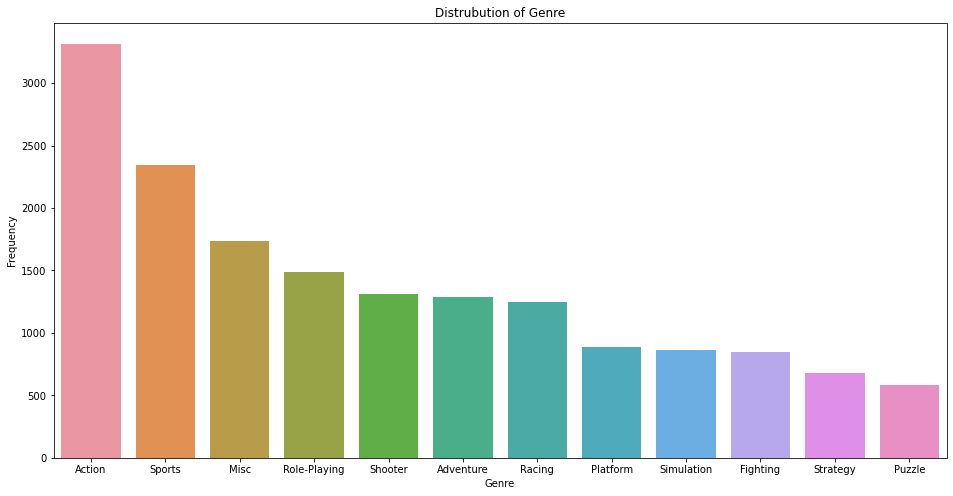

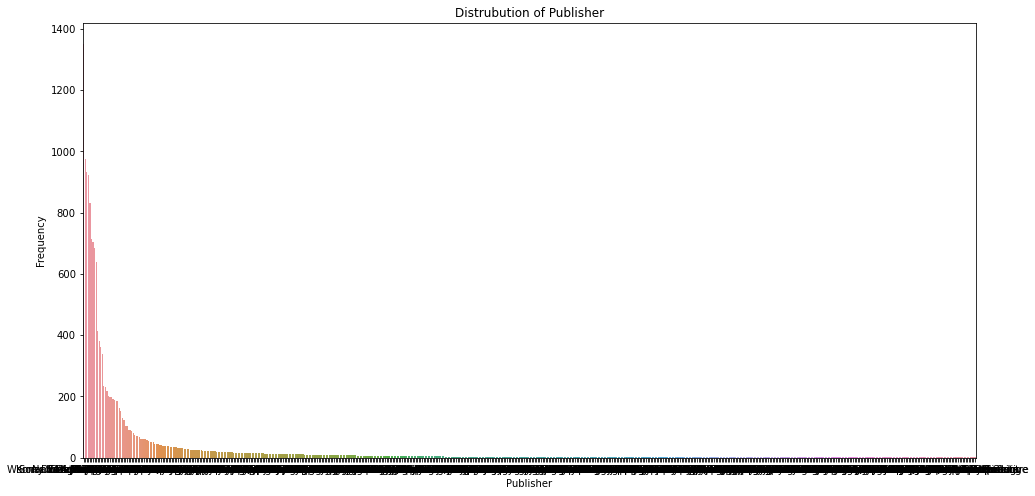

In [11]:
#Categorical Variables
cat=['Platform','Genre', 'Publisher']
df_cat=df[cat]
for var in df_cat:
    f,ax=plt.subplots(figsize=(16,8))
    sns.barplot(df_cat[var].value_counts().index,df_cat[var].value_counts()).set_title('Distrubution of ' + var)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

Some of the categorical variables are quite messy. Therefore, we may want to do some feature engineering to get a better representation of this in our model.

# Exploratory Data Analysis

We shall explore some key themes in this dataset:

1. Sales across different platforms 
2. Sales over the years
3. Genres that are the best selling
4. Most successful publishers
5. Comparing the sales data for games in the total series (FIFA, Call of Duty, GTA, etc.)
6. Console vs. Portable Device Video Game Sales

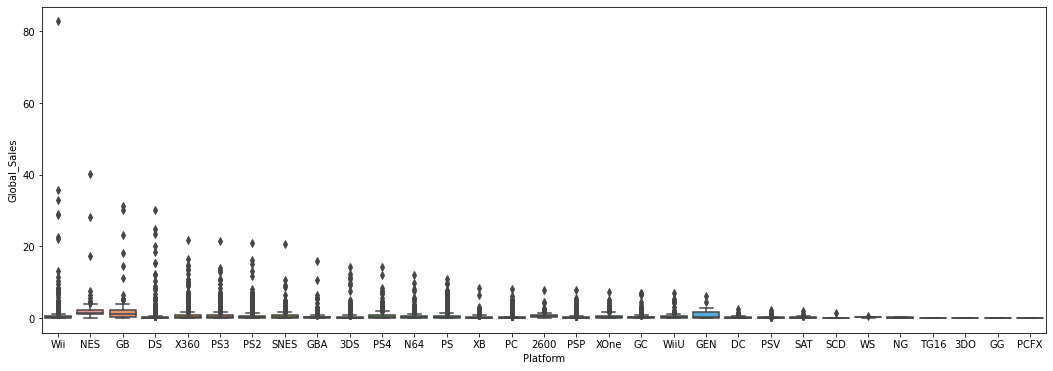

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,Platform,Global_Sales
0,GB,2.606633
1,NES,2.561939
2,GEN,1.050370
3,SNES,0.837029
4,PS4,0.827679
5,X360,0.774672
6,2600,0.729925
7,PS3,0.720722
8,Wii,0.699404
9,N64,0.686144


In [12]:
# Sales across different platforms:
f,ax=plt.subplots(figsize=(18,6))
sns.boxplot(df['Platform'],df['Global_Sales'])
plt.show()

#Calculate average sale price for each platform:
df2=df.groupby(['Platform'])['Platform','Global_Sales'].mean().sort_values(by='Global_Sales', ascending=False).reset_index()
df2

      Year  Global_Sales
0   1989.0      4.320588
1   1985.0      3.852857
2   1984.0      3.597143
3   1988.0      3.148000
4   1990.0      3.086875
5   1992.0      1.771163
6   1986.0      1.765238
7   1987.0      1.358750
8   1980.0      1.264444
9   1983.0      0.987647
10  1982.0      0.801667
11  1991.0      0.786098
12  1981.0      0.777609
13  1993.0      0.766333
14  1996.0      0.757224
15  1999.0      0.743402
16  1997.0      0.695433
17  2001.0      0.687697
18  1998.0      0.676702
19  2013.0      0.674194
20  1994.0      0.654298
21  2014.0      0.579124
22  2000.0      0.577536
23  2012.0      0.553333
24  2004.0      0.549554
25  2006.0      0.516905
26  2007.0      0.508428
27  2005.0      0.488778
28  2002.0      0.477105
29  2010.0      0.476926
30  2008.0      0.475420
31  2009.0      0.466317
32  2003.0      0.461742
33  2011.0      0.453020
34  2015.0      0.430684
35  1995.0      0.402329
36  2020.0      0.290000
37  2016.0      0.206192
38  2017.0      0.016667


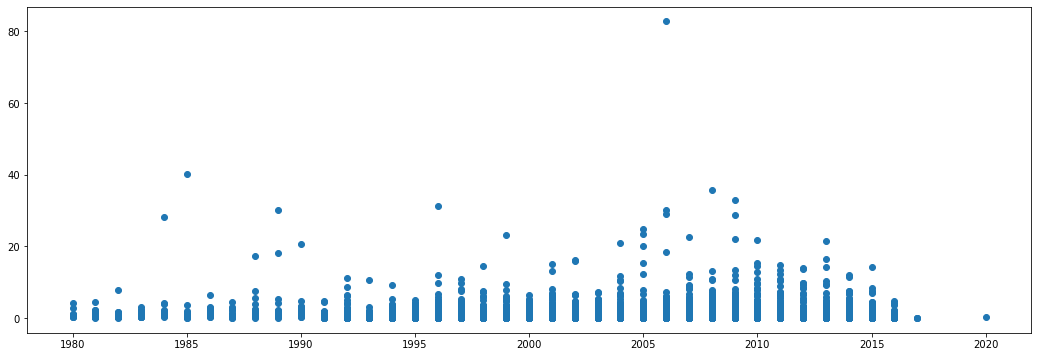

In [13]:
# Sales over the years 
df3 =df.groupby(['Year'])['Global_Sales'].mean().sort_values(ascending=False).reset_index()
print(df3)

# Scatter Plot
f,ax=plt.subplots(figsize=(18,6))
plt.scatter(df['Year'],df['Global_Sales'])


           Genre  Global_Sales
0       Platform      0.938341
1        Shooter      0.791885
2   Role-Playing      0.623233
3         Racing      0.586101
4         Sports      0.567319
5       Fighting      0.529375
6         Action      0.528100
7           Misc      0.465762
8     Simulation      0.452364
9         Puzzle      0.420876
10      Strategy      0.257151
11     Adventure      0.185879


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


(0.0, 10.0)

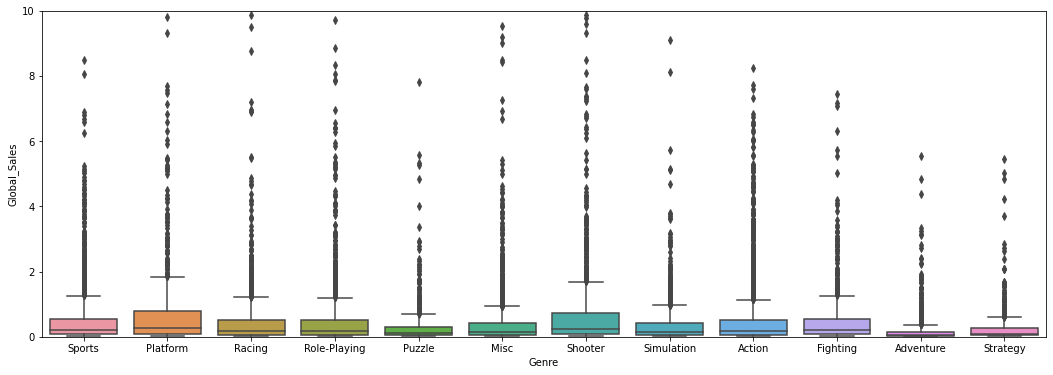

In [14]:
# Best Selling Genres:
df4 =df.groupby(['Genre'])['Genre','Global_Sales'].mean().sort_values(by='Global_Sales', ascending=False).reset_index()
print(df4)

# Boxplot comparison between genres
f,ax=plt.subplots(figsize=(18,6))
sns.boxplot(df['Genre'],df['Global_Sales'])
plt.ylim([0,10])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


                            Publisher  Global_Sales
0                              Palcom      4.170000
1                             Red Orb      2.620000
2                            Nintendo      2.541337
3                 Arena Entertainment      2.360000
4                         UEP Systems      2.250000
5                           RedOctane      2.170000
6                               Valve      1.740000
7                         Hello Games      1.600000
8  Sony Computer Entertainment Europe      1.592667
9                    Westwood Studios      1.550000


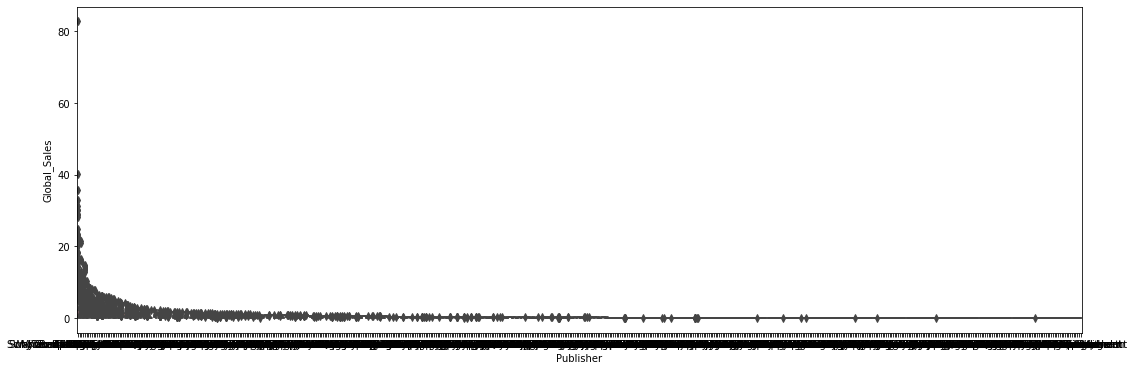

In [15]:
# Most Successful Publishers:
df5 =df.groupby(['Publisher'])['Publisher','Global_Sales'].mean().sort_values(by='Global_Sales', ascending=False).reset_index()
print(df5.head(10))

# Boxplot comparing Publishers:
f,ax=plt.subplots(figsize=(18,6))
sns.boxplot(df['Publisher'],df['Global_Sales'])

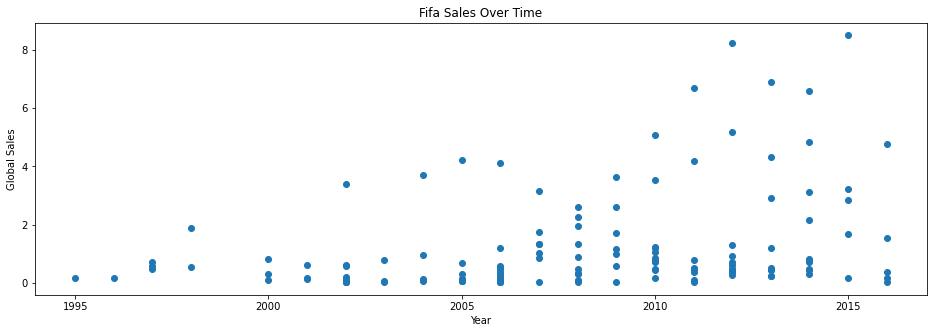

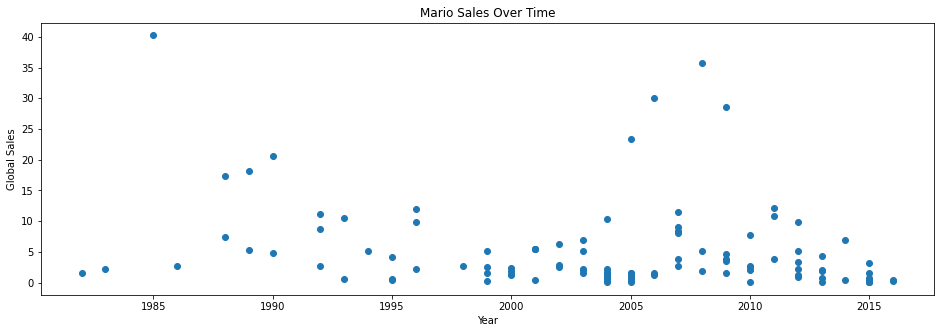

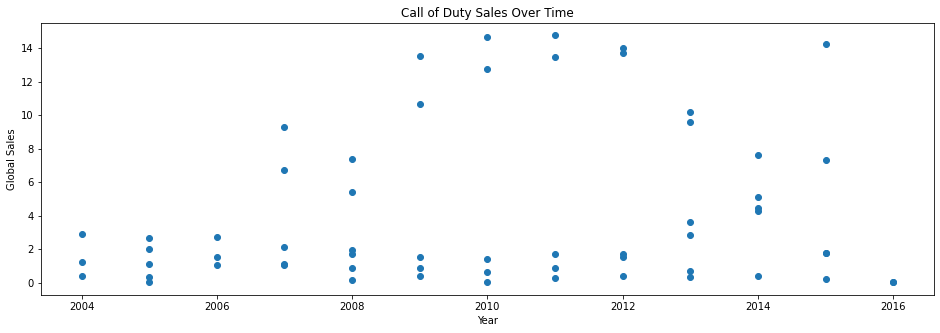

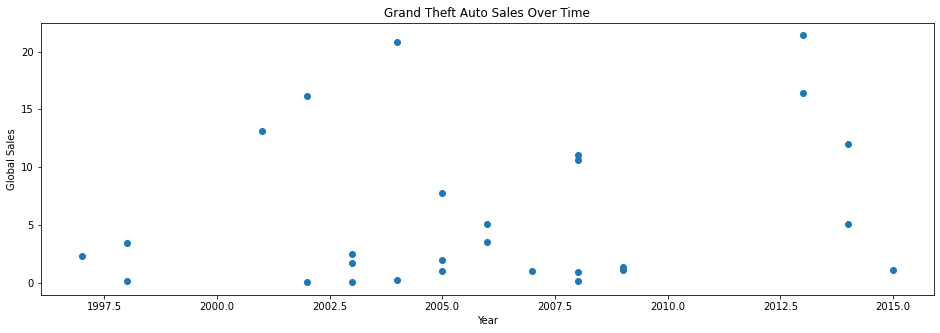

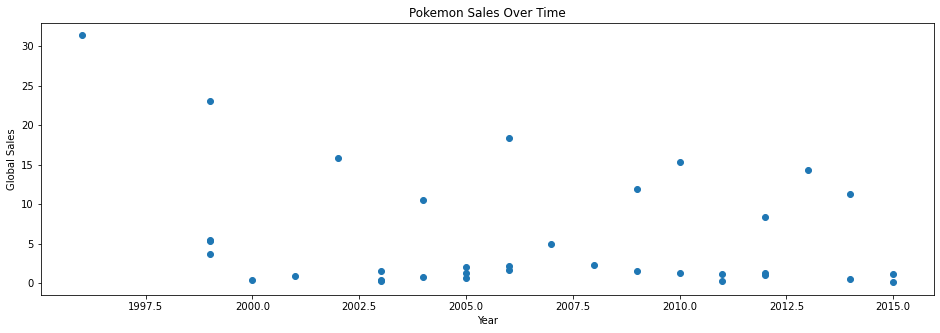

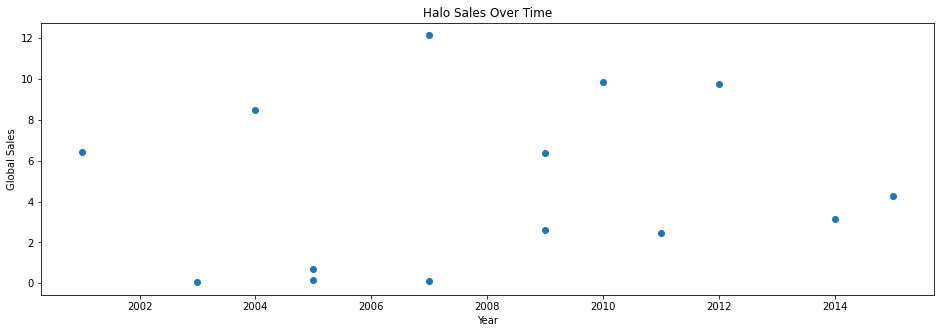

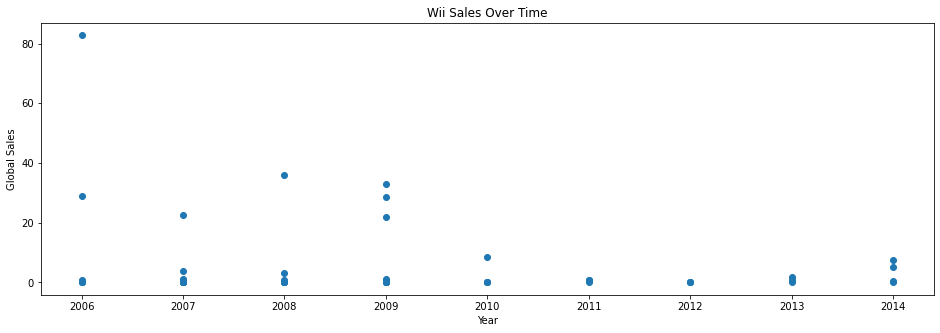

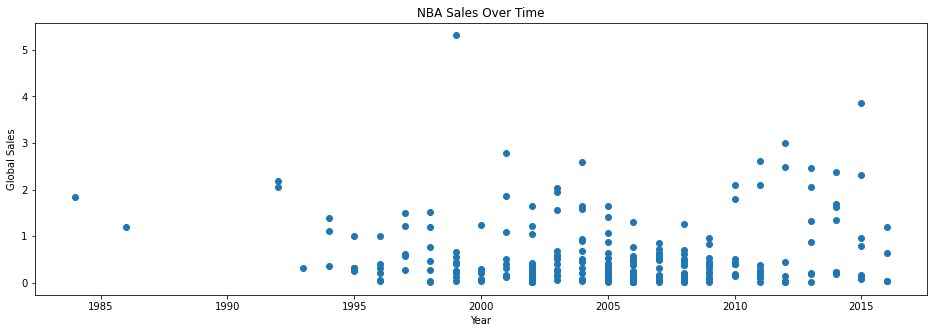

In [16]:
# Comparing Sales of Major Game Series
series=['Fifa','Mario','Call of Duty','Grand Theft Auto', 'Pokemon','Halo','Wii','NBA']

for ser in series:
    M = df[df['Name'].str.contains(ser, regex=False, case=False, na=False)].copy()
    f,ax=plt.subplots(figsize=(16,5))
    plt.scatter(M['Year'],M['Global_Sales'])
    plt.title(ser+' Sales Over Time')
    plt.xlabel('Year')
    plt.ylabel('Global Sales')
    plt.show()



In [17]:
# Compare average sales for each major game series
series=['Fifa','Mario','Call of Duty','Grand Theft Auto', 'Pokemon','Halo','Wii','NBA']
for ser in series:
    game_series={}
    M = df[df['Name'].str.contains(ser, regex=False, case=False, na=False)].copy()
    average= round(M['Global_Sales'].median(),2)
    correlation=M['Global_Sales'].corr(M['Year'])
    rounded_corr=round(correlation,2)
    print('The Median For {} Series is {}, its Correlation with Years is {}'.format(ser,average,rounded_corr))

The Median For Fifa Series is 0.52, its Correlation with Years is 0.32
The Median For Mario Series is 2.27, its Correlation with Years is -0.24
The Median For Call of Duty Series is 1.74, its Correlation with Years is 0.18
The Median For Grand Theft Auto Series is 2.41, its Correlation with Years is 0.25
The Median For Pokemon Series is 1.61, its Correlation with Years is -0.28
The Median For Halo Series is 3.71, its Correlation with Years is 0.13
The Median For Wii Series is 0.29, its Correlation with Years is -0.17
The Median For NBA Series is 0.32, its Correlation with Years is -0.0


['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


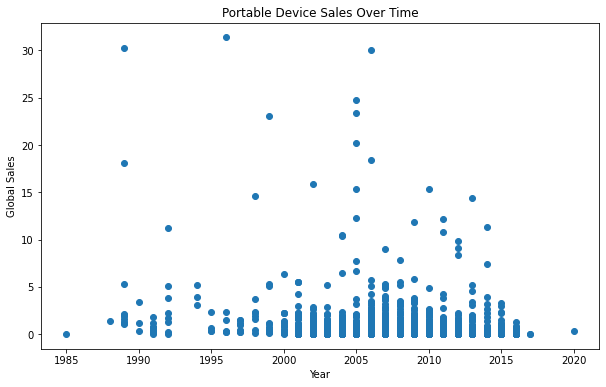

The Median Sales for Portable devices is 0.11


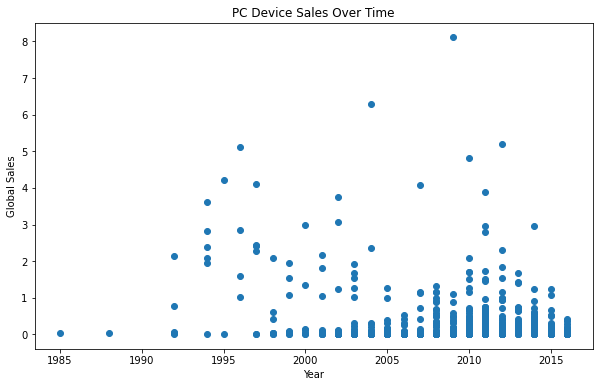

The Median Sales for PC devices is 0.04


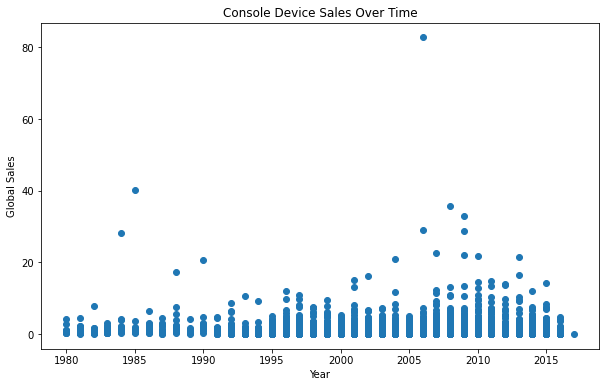

The Median Sales for Console devices is 0.23


In [18]:
# Compare Type of Device Game Sales 
print(df['Platform'].unique())
# 3 types: Portable, PC and Console
PC=['PC']
Portable = ['GB','DS','GBA','3DS','PSP','PSV','WS','GG']
df_portable=df[(df.Platform =='GB')|(df.Platform =='DS')|(df.Platform =='GBA')|(df.Platform =='3DS')|(df.Platform =='PSP')|(df.Platform =='PSV')
              |(df.Platform =='WS')|(df.Platform =='GG')]
df_PC=df[(df.Platform=='PC')]

df_console= df[(df.Platform =='Wii')|(df.Platform =='NES')|(df.Platform =='X360')|(df.Platform =='PS3')|(df.Platform =='PS2')|(df.Platform =='SNES')
              |(df.Platform =='PS4')|(df.Platform =='N64')|(df.Platform =='PS')|(df.Platform =='XB')|(df.Platform =='2600')|(df.Platform =='XOne')
             |(df.Platform =='GC')|(df.Platform =='WiiU')|(df.Platform =='GEN')|(df.Platform =='DC')
            |(df.Platform =='SAT')|(df.Platform =='SCD')|(df.Platform =='NG')|(df.Platform =='TG16')|(df.Platform =='3DO')
            |(df.Platform =='PCFX')]
d={'Portable':df_portable,'PC': df_PC,'Console':df_console}
for name,n in d.items():
    f,ax=plt.subplots(figsize=(10,6))
    plt.scatter(n['Year'],n['Global_Sales'])
    plt.title(name + ' Device Sales Over Time')
    plt.xlabel('Year')
    plt.ylabel('Global Sales')
    plt.show()
    average= n['Global_Sales'].median()
    print ("The Median Sales for {} devices is {}".format(name,average))




# **Feature Engineering**

1. Whether it is released on a Console, Portable device or PC
2. The game series it is apart of (We consider the ones we performed EDA on)
3. Percentage of Total Sales Per Region


In [19]:
len(df['Platform'])

16598

In [20]:
#Console, Portable or PC
Device=[]
for i in range(0,16598):
    if df['Platform'][i] in Portable:
        Device.append('Portable')
    elif df['Platform'][i] in PC:
        Device.append('PC')
    else:
        Device.append('Console')
df['Device']=Device
df.head()
        

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Device
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Console
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Console
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Console
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Console
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Portable


In [21]:
# Adding Feature of Game Series
series=['FIFA','Mario','Call of Duty','Grand Theft Auto', 'Pokemon','Halo','Wii','NBA']
for ser in series:
    df[ser]=df['Name'].str.contains(ser, regex=False, case=False, na=False)
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Device,FIFA,Mario,Call of Duty,Grand Theft Auto,Pokemon,Halo,Wii,NBA
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Console,False,False,False,False,False,False,True,False
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Console,False,True,False,False,False,False,False,False
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Console,False,True,False,False,False,False,True,False
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Console,False,False,False,False,False,False,True,False
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Portable,False,False,False,False,True,False,False,False
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Portable,False,False,False,False,False,False,False,False
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Portable,False,True,False,False,False,False,False,False
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,Console,False,False,False,False,False,False,True,False
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,Console,False,True,False,False,False,False,True,False
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,Console,False,False,False,False,False,False,False,False


In [22]:
# Percentage of Total Sales Per Region
regions_sales=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
for reg in regions_sales:
    A=df[reg]
    B=df['Global_Sales']
    df[reg+' As a percentage of Total']=round(100*(A/B),2)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,Call of Duty,Grand Theft Auto,Pokemon,Halo,Wii,NBA,NA_Sales As a percentage of Total,EU_Sales As a percentage of Total,JP_Sales As a percentage of Total,Other_Sales As a percentage of Total
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,...,False,False,False,False,True,False,50.15,35.07,4.56,10.22
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,...,False,False,False,False,False,False,72.27,8.90,16.92,1.91
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,...,False,False,False,False,True,False,44.25,35.96,10.58,9.24
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,...,False,False,False,False,True,False,47.73,33.36,9.94,8.97
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,...,False,False,True,False,False,False,35.93,28.34,32.58,3.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,...,False,False,False,False,False,False,100.00,0.00,0.00,0.00
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,...,False,False,False,False,False,False,100.00,0.00,0.00,0.00
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,...,False,False,False,False,False,False,0.00,0.00,0.00,0.00
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,...,False,False,False,False,False,False,0.00,100.00,0.00,0.00


# Data Pre-processing for Model 

Now that we have engineered 3 features that better represent our variables better. Let's start pre-processing the data so that we can apply our model to it:

**1. Splitting data into input and output variables**:

We will ignore the Video Game's Name and Platform from our dataset as we have feature engineered these variables into more useful ones.

We will also ignore the gross number of region sales and instead look at each as a percentage of the total. This is because the gross region sales are highly correlated with the global sales since they actually make it up. Therefore, if left this in our model since it would be a data leakage for our target variable. Despite this, it would be interesting to see if the distrbution of sales by region impacts the actual Global Sales number. Thus, we will look at this through expressing it as a percentage of global sales.   


**2. Dealing with missing values and cateogrical variables**

**3. Winsorization for outliers**

In our data set we can see that there is a significant outliers for global sales. We can see this in the distrbution plot of global sales where the mean is significantly lower than the maximum. The next closest global sales value is more than half of the maximum. In order to combat the impact that outliers will have on our model we will use winsorization to reduce its effect.    



In [23]:
# Splitting Data into input and output variables
features= ['Year', 'Genre', 'Publisher','Device',
       'FIFA', 'Mario', 'Call of Duty', 'Grand Theft Auto', 'Pokemon', 'Halo',
       'Wii', 'NBA', 'NA_Sales As a percentage of Total',
       'EU_Sales As a percentage of Total',
       'JP_Sales As a percentage of Total',
       'Other_Sales As a percentage of Total']
X=df[features]
X
y=df['Global_Sales']

In [24]:
# Checking for Missing values
print(X.isnull().sum())

Year                                    271
Genre                                     0
Publisher                                58
Device                                    0
FIFA                                      0
Mario                                     0
Call of Duty                              0
Grand Theft Auto                          0
Pokemon                                   0
Halo                                      0
Wii                                       0
NBA                                       0
NA_Sales As a percentage of Total         0
EU_Sales As a percentage of Total         0
JP_Sales As a percentage of Total         0
Other_Sales As a percentage of Total      0
dtype: int64


In [25]:
# Investigating which rows have missing values
df[df.isnull().any(axis=1)]
# For those with Publishers as NaN we will fill them with unknown
X.Publisher.fillna('Unknown',inplace=True)
X.Publisher.isnull().sum()

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


0

In [26]:
# Dealing with missing year value:
df[df.Year.isnull()]
# From look at this dataset there does not seem to be a pattern for missing years. We will therefore fill it by its median since 
# this will be a better measure of center than mean due to the left skewed distrbution of Years in this dataset
f=df.Year.median()
X.Year.fillna(f,inplace=True)
# We should indicate in which records we have imputed years column with the median
X['Year was Missing']=df.Year.isnull()
X[X['Year was Missing']==True]
# Confirm all missing values are filled
X.isnull().sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Year                                    0
Genre                                   0
Publisher                               0
Device                                  0
FIFA                                    0
Mario                                   0
Call of Duty                            0
Grand Theft Auto                        0
Pokemon                                 0
Halo                                    0
Wii                                     0
NBA                                     0
NA_Sales As a percentage of Total       0
EU_Sales As a percentage of Total       0
JP_Sales As a percentage of Total       0
Other_Sales As a percentage of Total    0
Year was Missing                        0
dtype: int64

In [27]:
# Now let's move on to the categorical variables
# For Series Type we have already encoded it using OneHotEncoding. The only other two variables left are Genre, Publisher and Device Type
# Check the cardinality for each of these variables
for col in ['Genre','Publisher','Device']:
    print('The cardinality of {} is {}'.format(col,X[col].nunique()))

The cardinality of Genre is 12
The cardinality of Publisher is 578
The cardinality of Device is 3


In [28]:
# For Device Type we can use One-Hot Encoding 
from sklearn.preprocessing import OneHotEncoder
OH_Encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')
low_card_col=['Device']
OH_cols_X=pd.DataFrame(OH_Encoder.fit_transform(X[low_card_col]))
OH_cols_X.index=X.index
other=X.drop(low_card_col,axis=1)
X_processed=pd.concat([other,OH_cols_X], axis=1)

In [29]:
# For the high cardinality columns we shall use label encoding to minimise the data transformations needed to take place
high_cardinality =['Genre','Publisher']
label_X=X_processed.copy()
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
for col in high_cardinality:
    label_X[col]=label_encoder.fit_transform(X[col])

In [30]:
# Winsorization
from scipy.stats.mstats import winsorize
y_w=winsorize(y,limits=0.0001)
y_w

masked_array(data=[4.024e+01, 4.024e+01, 3.582e+01, ..., 1.000e-02,
                   1.000e-02, 1.000e-02],
             mask=False,
       fill_value=1e+20)

# Let's Finally Start Model Building!

Using cross validation scores we will start to evaluate different models performance on our dataset

## Baseline Model Results

1. Linear Regression: 0.670
2. Decision Tree Regressor: 0.569
3. Random Forest Regressor: 0.570
4. Bagging Regressor: 0.572
5. Extra Trees Regressor: 0.569
6. Gradient Boosting: 0.566
7. **Voting Regressor #1: 0.561**  - where we will combine the best baseline models and make them vote on the final predicted value. 



In [31]:
# Linear Regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
cv=-1*cross_val_score(lin,label_X,y_w,cv=5,scoring='neg_mean_absolute_error')
print(cv)
print(cv.mean())

[1.78090332 0.32565356 0.42805548 0.45719344 0.35649035]
0.6696592284523869


In [32]:
# Decision Tree Regressor
from sklearn import tree
dt=tree.DecisionTreeRegressor(max_leaf_nodes=950,random_state=1)
cv=-1*cross_val_score(dt,label_X,y_w,cv=5,scoring='neg_mean_absolute_error')
print(cv)
print(cv.mean())

[1.60795881 0.50808008 0.32825729 0.19188193 0.20939328]
0.5691142784541159


In [33]:
# Random Forest Regressor
from sklearn import ensemble
rf=ensemble.RandomForestRegressor(n_estimators=100,random_state=1)
cv=-1*cross_val_score(rf,label_X,y_w,cv=5,scoring='neg_mean_absolute_error')
print(cv)
print(cv.mean())

[1.61390456 0.50743947 0.32987798 0.21514447 0.1843145 ]
0.5701361945374431


In [34]:
# Bagging  Regressor
bag=ensemble.BaggingRegressor(random_state=1)
cv=-1*cross_val_score(bag,label_X,y_w,cv=5,scoring='neg_mean_absolute_error')
print(cv)
print(cv.mean())

[1.61354894 0.51805752 0.33221711 0.21965096 0.17756602]
0.5722081099631178


In [35]:
# Extra Trees Regressor
etr=ensemble.ExtraTreesRegressor(random_state=1,n_estimators=100)
cv=-1*cross_val_score(etr,label_X,y_w,cv=5,scoring='neg_mean_absolute_error')
print(cv)
print(cv.mean())

[1.63069512 0.43772397 0.34430437 0.22276414 0.20771884]
0.5686412880722023


In [36]:
# Gradient Boosting Regressor
gb=ensemble.GradientBoostingRegressor(random_state=1)
cv=-1*cross_val_score(gb,label_X,y_w,cv=5,scoring='neg_mean_absolute_error')
print(cv)
print(cv.mean())

[1.66467689 0.40969828 0.33552868 0.2462282  0.17258251]
0.5657429093806507


In [37]:
#Now let's try combining all the models with a average MAE of lower than 0.57 in a Voting Regressor:
from sklearn.ensemble import VotingRegressor
voting_reg=VotingRegressor(estimators=[('dt',dt),('rf',rf),('gb',gb),('bag',bag),('etr',etr)])
cv=-1*cross_val_score(voting_reg,label_X,y_w,cv=5,scoring='neg_mean_absolute_error')
print(cv)
print(cv.mean())

[1.62615686 0.44864724 0.32669151 0.21317383 0.19012258]
0.5609584066836335


# Model Tuning

We will tune the following model to see if we want improve its performance:
* Random Forest

In [38]:
# Model Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

def model_performance(model,name):
    print(name)
    print('Best Score: {}'.format(model.best_score_))
    print('Best Parameters: {}'.format(model.best_params_))

In [39]:
# Random Forest Random Search
rf
param={
    'n_estimators':[100,500,1000]}
reg_rf_rs=GridSearchCV(rf, param_grid=param, cv = 5, verbose = True, n_jobs = -1)
best_reg_rf_rnd = reg_rf_rs.fit(label_X,y_w)
model_performance(best_reg_rf_rnd,'Random Forest')

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.4min finished


Random Forest
Best Score: -401.1161763168787
Best Parameters: {'n_estimators': 1000}


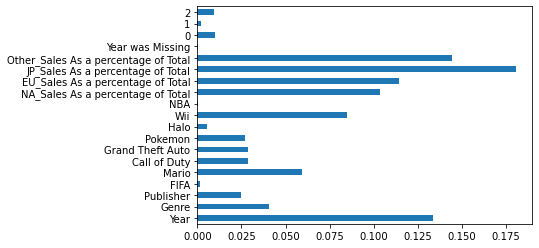

In [40]:
# Most Important Features for Random Forest
best_rf = best_reg_rf_rnd.best_estimator_.fit(label_X,y_w)
feat_importances = pd.Series(best_rf.feature_importances_, index=label_X.columns)
feat_importances.plot(kind='barh')

In [41]:
# Best RF Model
best_rf=best_reg_rf_rnd.best_estimator_

#Developing Voting Model
voting_reg_1 = VotingRegressor(estimators=[('dt',dt),('rf',best_rf),('gb',gb),('bag',bag),('etr',etr)])
cv=-1*cross_val_score(voting_reg_1,label_X,y_w,cv=5,scoring='neg_mean_absolute_error')
print('Cross Val Score: {}'.format(cv))
print('Average Cross Val Score: {}'.format(cv.mean()))

Cross Val Score: [1.6263099  0.44780771 0.32654437 0.21336654 0.19002783]
Average Cross Val Score: 0.5608112681823674


In [42]:
# Try and improve weights for the best voting model:
params = {'weights' : [[1,1,1,1,1],[1,2,1,1,1],[1,1,2,1,1],[1,2,2,1,1]]}

vote_weight = GridSearchCV(voting_reg_1, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
best_reg_weight = vote_weight.fit(label_X,y_w)
model_performance(best_reg_weight,'VR Weights')

best_vote=best_reg_weight.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  8.6min finished


VR Weights
Best Score: -322.0260425828039
Best Parameters: {'weights': [1, 1, 2, 1, 1]}


# Final Model Building

We will now build our final model using the tuned **voting regressor model** and test it on 1000 rows of the original dataset as our final test data in order to get key model metrics such as MAE and R2.

## Summary of Final Model Buliding Results
* MAE:
* R2: 



In [43]:
# Split Data into Train and Test
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(label_X,y_w,random_state=1,test_size=1000)

# Voting Regressor
# Train Model and Make predictions
best_vote.fit(train_X,train_y)
pred=best_vote.predict(test_X)

# Compute MAE and R2
from sklearn import metrics
mae=metrics.mean_absolute_error(test_y,pred)
r2=metrics.r2_score(test_y,pred)
print('The Mean Absolute Error for our final model is {}'.format(mae))
print('The R-squared score for our final model is {}'.format(r2))

The Mean Absolute Error for our final model is 0.3327021400635679
The R-squared score for our final model is 0.6786018958294034


In [44]:
feature_name=(test_X.columns.tolist())
feature_name[-3]='Console'
feature_name[-2]='PC'
feature_name[-1]='Portable'

In [45]:
# Explore feature importance
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(best_vote,random_state=1).fit(test_X, test_y)
eli5.show_weights(perm,feature_names = feature_name)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.6861 ± 0.1397,JP_Sales As a percentage of Total
0.3066 ± 0.2079,NA_Sales As a percentage of Total
0.2303 ± 0.0308,Mario
0.2203 ± 0.0139,Pokemon
0.2015 ± 0.1536,EU_Sales As a percentage of Total
0.1740 ± 0.0474,Year
0.1737 ± 0.1316,Other_Sales As a percentage of Total
0.0500 ± 0.0517,Genre
0.0255 ± 0.0078,Call of Duty
0.0163 ± 0.0087,Console


We can see in the table above that the top 3 features/predictors of a video game's global sales is:
1. Percentage of Total Sales in Japan
2. Percentage of Total Sales in North America
3. Mario Games

This provides really interesting insights into where video games should be targeted if a company wants to maxmise its sales. 
I will discussed these insights and my interpretations further in [my blog post](https://mirpurishail.wixsite.com/portfolio/data-blogs). 


# References

[The Dataset](https://www.kaggle.com/gregorut/videogamesales)

[Winsorization](https://www.youtube.com/watch?v=WLFQxoXn_uw) 

[Model Building and Tuning](https://www.kaggle.com/kenjee/titanic-project-example)

[Permutation Importance](https://www.kaggle.com/nitindatta/fifa-in-depth-analysis-with-linear-regression)

[SK Learn Documentation](https://scikit-learn.org/stable/index.html)